In [1]:
%matplotlib inline

from pathlib import Path 


import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.transforms as mtransforms
import matplotlib.colors as mcolors
import matplotlib.cm as mcm

from mpl_toolkits.axisartist.axislines import AxesZero


import papercolors as pc
from papercolors import colordict as pcd

paper_path = Path('../figures/tex/')

fs={'normal': 10, 'small':9, 'footnote':8, 'script':7, 'tiny':5, 'heading':12}


In [2]:
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{{amsmath}}'
mpl.rc('font', family='serif', serif="Times New Roman")
mpl.rcParams['figure.dpi']=200
mpl.rc("pgf", texsystem = "pdflatex", preamble = "\n".join(
    [r"\usepackage{inputenc}", 
     r"\usepackage[T1]{fontenc}",
     r"\usepackage{cmbright}",
     r'\usepackage{{amsmath}}', 
    ]))

In [3]:
x = np.array([[1,0,0], [0, 1, 0], [0, 0, 1]])
y = np.array([[0, -1, -1], [-1, 0, -1], [-1, -1, 0]])

In [4]:
cmap = mcolors.ListedColormap(['orange', 'white', 'purple'])
norm = mcolors.Normalize(vmin=-1, vmax=1)

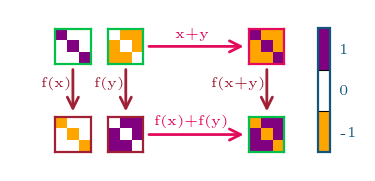

In [5]:
fig, ax = plt.subplots(figsize=(2, 1))
ax.set(xticks=[], yticks=[], xlim=(0,2), ylim=(0,1), aspect='equal')

w = h = .25
left = 0+w*.25
right = 1-w
top = 1-w*1.25
bottom = 0+w*.25

boxes = [('x', (left, top)),('y', (left+ w*.75, top)), ('x+y', (right, top)), ('fx', (left, bottom)),('fy', (left+ w*.75, bottom)) , ('fx+y', (right, bottom))]
axd = {}
for (d, (xi, yi)) in boxes:
    axd[d] = ax.inset_axes([xi, yi, w, h])
    axd[d].set(xticks=[], yticks=[], aspect='equal')
    
# (x,y), # (f(x), f(y)
for axn, d in [('x', x), ('y', y)]:
    axd[axn].imshow(d, cmap=cmap, norm=norm)
    axd[axn].spines[:].set_edgecolor(pcd['section'])
    axd[f"f{axn}"].imshow(d*-1, cmap=cmap, norm=norm)
    axd[f"f{axn}"].spines[:].set_edgecolor(pcd['action'])

for axn, d, ec in [('x+y', x+y, 'fiber'), ('fx+y', (x+y)*-1, 'section')]:
    im = axd[axn].imshow(d, cmap=cmap, norm=norm)
    axd[axn].spines[:].set_edgecolor(pcd[ec])

# arrows: annotate: tail, head, tail=text, xy=head
# f(x), f(y)
for l in ['x', 'y', 'x+y']:
    f = ax.annotate("", (.5, 1), (.5,0), xycoords= axd[f'f{l}'], textcoords= axd[l], arrowprops=dict(arrowstyle="->,widthA=.15,lengthA=0", color=pcd['action'])) 
    ax.annotate(f"f({l})", xytext=(.4, .55), xy=(0,0), textcoords=f, ha='right', va='center', fontsize=fs['tiny'], color=pcd['action'], rotation=0)

for (s, t, lab) in [('y', 'x+y', 'x+y'), ('fy', 'fx+y', 'f(x)+f(y)')]:
    f = ax.annotate("", (0, .5), (1, .5), xycoords= axd[t], textcoords= axd[s], arrowprops=dict(arrowstyle="->,widthA=.15,lengthA=0", color=pcd['fiber']))
    ax.annotate(lab, xytext=(.5, 1), xy=(0,0), textcoords=f, ha='center', va='bottom', fontsize=fs['tiny'], color=pcd['fiber'], rotation=0)
ax.spines[:].set_edgecolor('white')
cb = fig.colorbar(mcm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, fraction=.04, aspect=10,  spacing='uniform', drawedges=True)
cb.set_ticks([-1+(2/6), 0, 1-(2/6)])
cb.set_ticklabels([-1, 0, 1], fontsize=fs['tiny'], color=pcd['artist'],)
cb.ax.spines[:].set_edgecolor(pcd['artist'])
cb.ax.tick_params(length=0, color=pcd['artist'])

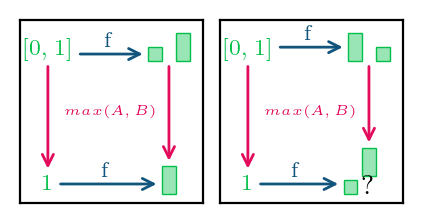

In [195]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(2, 1), layout='compressed')

for ax in [ax1, ax2]:
    ax.set(xticks=[], yticks=[], aspect='equal')

b1y1 = .775
b2y2 = .05
x1 = 0.02

bw = .075
b1h = .075
b2h = .15
b1x1 = .7

for ax in [ax1, ax2]:
    ax.text(.5, .5,  "$max(A, B)$", fontsize=fs['tiny'], color=pcd['fiber'], ha='center', va='center')
    
    xy = ax.text(x1, b1y1, "[0, 1]", ha='left', va='bottom', fontsize=fs['footnote'], color=pcd['section'])
    xley = ax.annotate("$1$", xy=(0,0), xytext=(.5, b2y2), textcoords=(xy, 'data'), ha='center', va='bottom', fontsize=fs['footnote'], color=pcd['section'])
    
    # arrows: annotate: tail, head, tail=text, xy=head
    
    f = ax.annotate("", (.475, 1), (.475,0), xycoords=(xy, xley) , textcoords= xy, arrowprops=dict(arrowstyle="->,widthA=.15,lengthA=0", color=pcd['fiber'])) 

    gap = .075

    if ax == ax1:
        b1 = mpatches.Rectangle((b1x1,b1y1), bw, b1h, ec = pcd['section'], fc=(pcd['section'], .4), lw=.5)
        b2  = mpatches.Rectangle((b1x1+bw + gap,b1y1), bw, b2h, ec = pcd['section'], fc=(pcd['section'], .4), lw=.5) 
        b3 = mpatches.Rectangle((b1x1+(bw + gap)/2, b2y2), bw, b2h, ec = pcd['section'], fc=(pcd['section'], .4), lw=.5) 
    else:
        b1 = mpatches.Rectangle((b1x1, b1y1), bw, b2h, ec = pcd['section'], fc=(pcd['section'], .4), lw=.5)
        b2  = mpatches.Rectangle((b1x1+bw + gap,b1y1), bw, b1h, ec = pcd['section'], fc=(pcd['section'], .4), lw=.5) 
        hoff = .1
        b3 = mpatches.Rectangle((b1x1+(bw + gap)/2, b2y2 + hoff), bw, b2h, ec = pcd['section'], fc=(pcd['section'], .4), lw=.5) 
        b4 =  mpatches.Rectangle((b1x1+(bw + gap)/2 - hoff, b2y2), bw, b1h, ec = pcd['section'], fc=(pcd['section'], .4), lw=.5) 
        ax.add_patch(b4)
        
    for b in [b1, b2, b3]:
        ax.add_patch(b)
    
    f2 = ax.annotate("", (.5, 1), (.5,0), xycoords=b3 , textcoords= (b3, b1), arrowprops=dict(arrowstyle="->,widthA=.15,lengthA=0", color=pcd['fiber'])) 
    
    #t1 = ax.text(b1x1-bw/2, b1y1+b2h/2, "[", ha='left', va='center', fontsize=fs['heading'], color=pcd['section'])
    #t2 = ax.text(b1x1+2*bw+gap, b1y1+b2h/2, "$]$", ha='left', va='center', fontsize=fs['heading'], color=pcd['section'])
    #ax.text(b1x1+(bw + gap*.75), b1y1-gap/2, "$,$", ha='center', va='bottom', fontsize=fs['normal'], color=pcd['section'])
    
    # artists
    if ax==ax1: 
        loc = ((b3, xley), xley)
    else:
        loc = ((b4, xley), xley)

    for xy, text in [(b1, (xy, b1)), loc]:
        a = ax.annotate("", (0, .5), (1, .5), xycoords=xy, textcoords=text,  arrowprops=dict(arrowstyle="->,widthA=.15,lengthA=0", color=pcd['artist']))
        ax.annotate("f", xy=(0,0), xytext =(.5, .75), textcoords=a, ha='center', va='bottom', color=pcd['artist'],  fontsize=fs['footnote'])

    if ax == ax2:
        ax.text((b1x1+(bw + gap)/2), b2y2, "?")


In [81]:
pcd.keys()

dict_keys(['total', 'fiber', 'base', 'section', 'artist', 'homset', 'action', 'monoid', 'sheaf', 'source', 'target', 'functor', 'nattran', 'set'])

In [101]:
2/3

0.6666666666666666